In [2]:
#필요 모듈 호출
import numpy as np #행렬 연산 패키지
from scipy import stats #과학 계산 패키지
import scipy.stats #통계 분석 패키지
import pandas as pd #데이터 패키지
import statsmodels.api as sm #통계 분석 패키지
import matplotlib.pyplot as plt #데이터 시각화 패키지
import seaborn as sns #데이터 시각화 패키지
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

In [5]:
#p.183 [실습] 상관분석
df1 = [37.6, 38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5] #강도 값 입력
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21] #온도 값 입력

corr, pval = stats.pearsonr(df1, df2) #Correlation Analysis 실행 및 변수 저장
 
print("Correlation Analysis") #결과 출력
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

# 대립가설: 초코칩의 강도와 재료 반죽온도간에 매우 강한 상관성이 있다.
# p<0.05이므로, 초코칩의 강도와 재료 반죽온도간에는 매우 강한 상관성이 있다고 볼 수 있다.
# 즉, 대립가설을 채택한다.

Correlation Analysis
corr:-0.723
p-value : 0.000


/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        09:24:26   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0013      4.184      3.108      

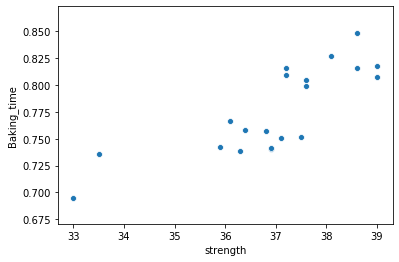

In [6]:
#p.204 [실습] 단순선형회귀
df = pd.DataFrame({'strength' : [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
'Baking_time' : [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]})

df.head()

sns.scatterplot(x='strength', y='Baking_time', data=df)

Baking = sm.add_constant(df['Baking_time'])
model = sm.OLS(df['strength'], Baking)
result = model.fit()

print(result.summary())

# 회귀식은 Baking_time = 13.00013 + 30.8722 * strength 이다.
# Baking_time의 P값은 p<0.05 이므로 유의미하다.
# R-square 값은 0.646으로 설명력이 높은 편이다.
# 따라서, 초코칩의 강도와 굽는 시간과의 인과관계가 있다고 볼 수 있다.

In [7]:
#p.207 [실습] 단순선형회귀
df_raw = pd.read_csv("/home/pirl/Downloads/correaltion.csv", engine = "python") #데이터를 불러옴
df_raw.head(3)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols(formula = "strength~Oven_TMP", data=df_raw)

result = model.fit()
print(result.summary())

#회귀식은 strength = 30.419 + 0.0056 * Oven_TMP이다. 설명력은 R-Sq = 0.1%이다.
# R-square 값은 0.001으로 설명력이 낮은 편이다.
# 따라서, 초코칩의 강도와 오븐 온도와의 인과관계는 없다고 볼 수 있다.

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Tue, 28 Jan 2020   Prob (F-statistic):              0.737
Time:                        09:34:23   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

In [9]:
#본사에서는 대리점의 위치별(중심자, 시내, 쇼핑센터) 상품판매량에 차이가 있는지 검정하라(유의수준 5%)
df = pd.read_csv("/home/pirl/Downloads/storesales.csv", engine = "python", encoding = 'euckr')
formula='sales~C(weekday) + C(position) + C(weekday):C(position)'
lm = ols(formula, df).fit()
print(anova_lm(lm))


# PR(>F) 항목은 F검정통계량의 결과로 P값으로 볼 수 있다.
# weekday의 p값은 0.05보다 크므로, weekday와 상품판매량의 관계는 없다고 볼 수 있다.
# position의 p값은 0.05보다 작으므로,position과 상품판매량의 관계는 있다고 볼 수 있다.
# weekday와 position과의 교차 관계의 p값은 0.05보다 크므로, 서로 관계가 없다고 볼 수 있다.

                          df        sum_sq       mean_sq         F    PR(>F)
C(weekday)               4.0  7.083747e+06  1.770937e+06  1.732501  0.168888
C(position)              2.0  1.728288e+07  8.641441e+06  8.453891  0.001225
C(weekday):C(position)   8.0  1.952911e+06  2.441138e+05  0.238816  0.980024
Residual                30.0  3.066555e+07  1.022185e+06       NaN       NaN


# 기타 연습 문제

In [10]:
#p181
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value : {0:0.3f}'.format(pval))

Correlation Analysis
corr:0.989
p-value : 0.000


In [ ]:
#p.205
df_raw = pd.read_csv("/home/pirl/Downloads/직무능력평가.csv", engine = "python") #데이터를 불러옴
df_raw.head(3)

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols(formula = "EVAL~DISSATIS", data=df_raw)

result = model.fit()
print(result.summary())